In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
# 利用线性回归预测波士顿的房价
# 波士顿房价数据集包含在 scikit-learn 的内置数据集中，可以直接使用
from sklearn.datasets import load_boston
boston = load_boston()

print("> boston.keys", boston.keys())
print("> boston.data.shape", boston.data.shape)
print("> boston.feature_names", boston.feature_names)
# 结论：波士顿数据集有 506 个样本，13 个特征

> boston.keys dict_keys(['data', 'target', 'feature_names', 'DESCR'])
> boston.data.shape (506, 13)
> boston.feature_names ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [3]:
# print("boston.DESCR", boston.DESCR)

In [4]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
# 修改列标签
bos.columns = boston.feature_names
boston.target[:5]

# 添加列
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


线性回归算法w值： [-1.07170557e-01  4.63952195e-02  2.08602395e-02  2.68856140e+00
 -1.77957587e+01  3.80475246e+00  7.51061703e-04 -1.47575880e+00
  3.05655038e-01 -1.23293463e-02 -9.53463555e-01  9.39251272e-03
 -5.25466633e-01]
线性回归算法b值:  36.491103280363404


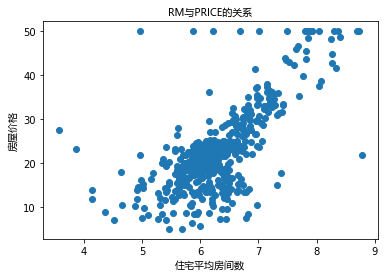

In [6]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis=1)
lm = LinearRegression()

lm.fit(X, bos.PRICE)

print('线性回归算法w值：', lm.coef_)
print('线性回归算法b值: ', lm.intercept_)


import matplotlib.font_manager as fm
myfont = fm.FontProperties(fname='C:/Windows/Fonts/msyh.ttc')
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel(u'住宅平均房间数', fontproperties=myfont)
plt.ylabel(u'房屋价格', fontproperties=myfont)
plt.title(u'RM与PRICE的关系', fontproperties=myfont)
plt.show()

In [7]:
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

In [8]:
mse = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mse)

21.897779217687486
